https://nbviewer.jupyter.org/github/jmportilla/Udemy-notes/tree/master/

https://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20Logistic%20Regression.ipynb

https://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20Logistic%20Regression%20-%20LiveCode.ipynb

## Logistic Regression

#### What is Logistic Regression?
 Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. \
 The logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. 
 - In a binary logistic regression model, the dependent variable has two levels (categorical)
 - <span style="color:red">The logistic regression model itself simply models probability of output in terms of input and does not perform statistical classification</span>
 - it can be used to make a classifier

Logistic Regression: https://en.wikipedia.org/wiki/Logistic_regression \
Logistic Fuction: https://en.wikipedia.org/wiki/Logistic_function \
Depedent Variable: https://en.wikipedia.org/wiki/Dependent_and_independent_variables 


1. Basic Mathematical Overview of the Logistic Function
2. Extra Math Resources
3. DataSet Analysis
4. Data Visualization
5. Data Preparation
6. Multicollinearity Consideration
7. Logistic Regression with SciKit Learn
8. Testing and Training Data Sets
9. Conclusion and More Resources

In [10]:
# focusing on binary classification (1/0, +/-, True/False)

# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import train_test_split X
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

### Step 1:  Basic Mathematical Overview of the Logistic Function

First, let's take a look at the [Logistic Function](http://en.wikipedia.org/wiki/Logistic_function). The logistic function can take an input from negative to positive infinity and it has always has an output between 0 and 1. The logistic function is defined as: 
    $$ \sigma (t)= \frac{1}{1+e^{-t}}$$
    
A graph of the logistic function looks like this (following code):

Text(0.5, 1.0, 'Logistic Function')

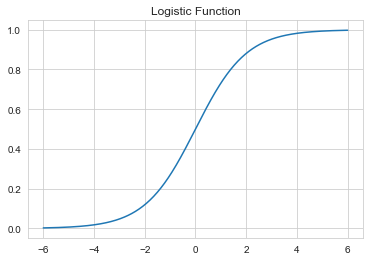

In [13]:
# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# Set t from -6 to 6 ( 500 elements, linearly spaced )
t = np.linspace(-6,6,500)

y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t, y)
plt.title('Logistic Function')

   Linear Regression Lectures, we could describe a [Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) Function model as:
    $$ y_i = \beta _1 x_{i1} + ... + \beta _i x_{ip}$$
   Which was basically an expanded linear equation (y=mx+b) for various x data features. In the case of the above equation, we presume a data set of 'n' number of units, so that the data set would have the form:
    $$ [ y_i, x_{i1},...,x_{ip}]^{n}_{i=1}$$
   For our logistic function, if we view *t* as a linear function with a variable *x* we could express t as:
    $$ t = \beta _0 + \beta _1 x $$
  Here, we've basically just substituted a linear function (form similar to y=mx+b) for t. We could then rewrite our logistic function equation as:
    $$ F(x)= \frac{1}{1+e^{-(\beta _0 + \beta _1 x)}}$$

-----------------

### Step 2: Extra Math Resources

This is a very basic overview of binary classification using Logistic Regression, if you're still interested in a deeper dive into the mathematics, check out these sources:
    
   1.) [Andrew Ng's class notes](http://cs229.stanford.edu/notes/cs229-notes1.pdf) on Logistic Regression (Note: Scroll down)
    
   2.) [CMU notes](http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf) Note: Advanced math notation.
    
   3.) [Wikipedia](http://en.wikipedia.org/wiki/Logistic_regression) has a very extensive look at logistic regression.

-----------------

### Step 3: Data Analysis
   Let us go ahead and take a look at the [dataset](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html)
 The dataset is packaged within Statsmodels. It is a data set from a 1974 survey of women by Redbook magazine. Married women were asked if they have had extramarital affairs. The published work on the data set can be found in:
 
   [Fair, Ray. 1978. “A Theory of Extramarital Affairs,” `Journal of Political Economy`, February, 45-61.](http://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf
  
   It is important to note that this data comes from a self-reported survey, which can have many issues as far as the accuracy of the data. Also this analysis isn't trying to promote any agenda concerning women or marriage, the data is just interesting but its accuracy should be met with a healthy dose of skepticism.
   
   In this case we will approach this as a classification problem by asking the question: \
*Given certain variables for each woman, can we classify them as either having particpated in an affair, or not participated in an affair?*

#### DataSet Description
    
   From the [Statsmodels website](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) we have the following information about the data:
    
   Number of observations: 6366
   Number of variables:
   Variable name definitions:
    
        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
                        technician, skilled worker, 5 = managerial,
                        administrative, business, 6 = professional with
                        advanced degree
        occupation_husb : Husband's occupation. Same as occupation.
        affairs         : measure of time spent in extramarital affairs
    

-----------------

###  Step 4: Data Visualization

In [14]:
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [21]:
 def affair_check(x):
        if x != 0:
            return 1
        else:
            return 0

df['Had_Affair'] = df['affairs'].apply(affair_check)

In [22]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [24]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


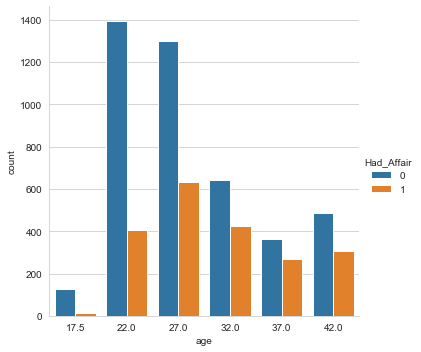

In [27]:
# 1
sns.catplot('age', data = df, hue = 'Had_Affair', kind = 'count')